# Intro to Convolutional Neural Networks
*[Check the original article](https://docs.w3cub.com/tensorflow~guide/tutorials/layers)*


Convolutional neural networks (CNNs) are the current state-of-the-art model architecture for image classification tasks. CNNs apply a series of filters to the raw pixel data of an image to extract and learn higher-level features, which the model can then use for classification. CNNs contains three components:

- **Convolutional layers**, which apply a specified number of convolution filters to the image. For each subregion, the layer performs a set of mathematical operations to produce a single value in the output feature map. Convolutional layers then typically apply a ReLU activation function to the output to introduce nonlinearities into the model.

- **Pooling layers**, which downsample the image data extracted by the convolutional layers to reduce the dimensionality of the feature map in order to decrease processing time. A commonly used pooling algorithm is max pooling, which extracts subregions of the feature map (e.g., 2x2-pixel tiles), keeps their maximum value, and discards all other values.

- **Dense (fully connected) layers**, which perform classification on the features extracted by the convolutional layers and downsampled by the pooling layers. In a dense layer, every node in the layer is connected to every node in the preceding layer.

Typically, a CNN is composed of a stack of convolutional modules that perform feature extraction. Each module consists of a convolutional layer followed by a pooling layer. The last convolutional module is followed by one or more dense layers that perform classification. The final dense layer in a CNN contains a single node for each target class in the model (all the possible classes the model may predict), with a softmax activation function to generate a value between 0–1 for each node (the sum of all these softmax values is equal to 1). We can interpret the softmax values for a given image as relative measurements of how likely it is that the image falls into each target class.

In [12]:
# https://omegaml.github.io/omegaml/nb/tfestimator-tutorial.html?highlight=mnist

# https://omegaml.github.io/omegaml/guide/getstarted.html#starting-omega-ml-locally

# !wget https://raw.githubusercontent.com/omegaml/omegaml/master/docker-compose.yml
# !docker-compose up -d

In [13]:
import omegaml as om

In [14]:
om.models.list()

['classifier_10000', 'classifier_30000', 'classifier_60000', 'classifier_new']

In [16]:
import matplotlib.pyplot as plt

# Import the mnist dataset
# https://github.com/datapythonista/mnist
import mnist

# Import classifiers and performance metrics
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time
import random

## Load the data

In [17]:
# Choose the size of the training dataset
row_number = 10000

In [18]:
# The mnist dataset originally 28x18
all_images = mnist.train_images()

# Downsample the training dataset
assert row_number<= all_images.shape[0], 'The number of rows wanted is higher than the size of the training dataset.'
train_images = all_images[:row_number, :]

# train_labels
all_labels = mnist.train_labels()
train_labels = all_labels[:row_number]

In [19]:
# Load the test dataset
test_images = mnist.test_images()
test_labels = mnist.test_labels()

## Assess the quality of the training and test datasets

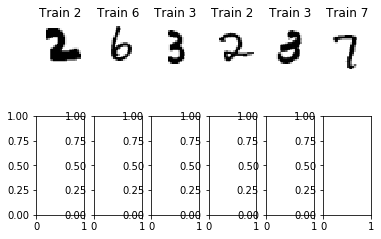

In [20]:
# Show a random sample of drawings from the train_images
n_show = 6
n = random.randint(n_show,train_images.shape[0]-n_show)

_, axes = plt.subplots(2, n_show)
images_and_labels = list(zip(train_images, train_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[n:n+n_show]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Train %i' % label)

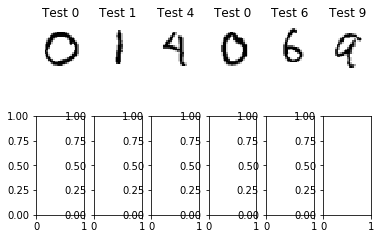

In [21]:
# Show a random sample of drawings from the test_images (for quality check)
n_show = 6
n = random.randint(n_show,test_images.shape[0]-n_show)

_, axes = plt.subplots(2, n_show)
images_and_labels = list(zip(test_images, test_labels))
for ax, (image, label) in zip(axes[0, :], images_and_labels[n:n+n_show]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Test %i' % label)

## Preprocessing

In [24]:
# Normalising the images
norm_images = train_images/255
norm_test = test_images/255

## Model function for CNN

In [25]:
input_layer = tf.reshape(norm_images, [-1, 28, 28, 1]) # Add a necessary dimension for the convolutional layer

In [28]:
# Convolutional Layer #1
conv1 = tf.layers.conv2d(
    inputs=input_layer,
    filters=32,
    kernel_size=[5, 5], # Change to 3x3
    padding="same",
    activation=tf.nn.relu)

# Pooling Layer #1
pool1 = tf.layers.max_pooling2d(
    inputs=conv1,
    pool_size=[2, 2],
    strides=2)

In [29]:
# Convolutional Layer #2 and Pooling Layer #2
conv2 = tf.layers.conv2d(
    inputs=pool1,
    filters=64,
    kernel_size=[5, 5],
    padding="same",
    activation=tf.nn.relu)

# Pooling Layer #1
pool2 = tf.layers.max_pooling2d(
    inputs=conv2,
    pool_size=[2, 2],
    strides=2)

In [32]:
# Dense Layer
pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
dense = tf.layers.dense(
    inputs=pool2_flat,
    units=1024,
    activation=tf.nn.relu)

dropout = tf.layers.dropout(
    inputs=dense,
    rate=0.4,
    training_mode = tf.estimator.ModeKeys.TRAIN)

TypeError: dropout() got an unexpected keyword argument 'training_mode'

## Train a model

In [56]:
# Create a classifier: a support vector classifier
classifier_new = svm.SVC(gamma=0.001)

In [57]:
# Train the model
# Time consuming task generally realized in 8min
start_time = time.time()

classifier_new.fit(flatten_images, train_labels)

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Model fitted in '+ str(dur_min) + " minutes.")

Model fitted in 13 minutes.


In [58]:
# Publishing the model
# Time consuming task generally realized in 2min
start_time = time.time()

om.models.put(classifier_new, 'classifier_60000')

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Model stored in '+ str(dur_min) + " minutes.")

Model stored in 5 minutes.


In [59]:
om.models.revisions('classifier_60000')

[('c71c8a7c7196d9795191d1c6bd3c53e62974caac', ['latest'])]

In [60]:
om.models.list()

['classifier_10000', 'classifier_30000', 'classifier_60000', 'classifier_new']

In [61]:
# Retrieving a model
classifier_test = om.models.get('classifier_60000')
classifier_test

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testing on a single instance

Instance from the mnist.test_images() on row 1284
Expected: 3
Predicted: 3


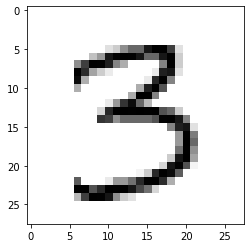

In [62]:
n = random.randint(0,test_images.shape[0])
test_single = test_images[n]

flatten_single = test_single.reshape(1, -1)/255 # Do not forget to normalize !
predicted = classifier_test.predict(flatten_single)

plt.imshow(test_single, cmap=plt.cm.gray_r, interpolation='nearest')
print('Instance from the mnist.test_images() on row %i' %n)
print('Expected: %i' % test_labels[n])
print('Predicted: %i' % predicted)

## Model metrics

In [65]:
# Predict the full test dataset
# Time consuming task generally realized in XXmin
start_time = time.time()

predicted = classifier_test.predict(flatten_test)

end_time = time.time()
dur_min = int((end_time - start_time)/60)
print('Prediction on the test dataset done in '+ str(dur_min) + " minutes.")

Prediction on the test dataset done in 4 minutes.


In [66]:
# Generate classification report

print("Classification report for classifier %s:\n%s\n"
      % (classifier_new_test, metrics.classification_report(test_labels, predicted)))

NameError: name 'classifier_new_test' is not defined